In [ ]:
!git clone https://github.com/ultralytics/yolov5 
%cd yolov5
!pip install -r requirements.txt

Cloning into 'yolov5'...
remote: Enumerating objects: 15368, done.
remote: Counting objects: 100% (13/13), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 15368 (delta 1), reused 4 (delta 0), pack-reused 15355
Receiving objects: 100% (15368/15368), 14.36 MiB | 31.03 MiB/s, done.
Resolving deltas: 100% (10504/10504), done.
/content/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 8.2 MB/s eta 0:00:00


In [ ]:
!python train.py --img 640 --epochs 3 --data VisDrone.yaml --weights yolov5s.pt

2023-04-04 01:41:47.680411: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-04 01:41:48.808262: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=yolov5s.pt, cfg=, data=VisDrone.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=3, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1

In [ ]:
!pip install ultralytics

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.6/490.6 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 KB 18.6 MB/s eta 0:00:00


In [ ]:
import cv2
import torch
import glob
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
path = sorted(glob.glob("*.jpg"))

In [ ]:
len(path)

233

In [ ]:
vid = []
for i in path:
  im = cv2.imread(i)
  vid.append(im)

In [ ]:
vid = np.array(vid)
vid.shape

(233, 1512, 2688, 3)

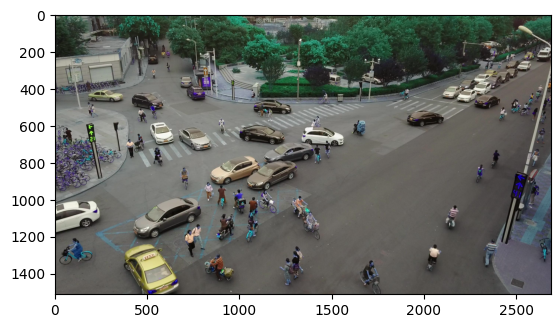

In [ ]:
plt.imshow(vid[0])
plt.show()

In [ ]:
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('output.mp4', fourcc, 20.0, (2688,1512))

In [ ]:
for i in range(vid.shape[0]):
  out.write(vid[i])

out.release()

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='best.pt')

Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2023-4-4 Python-3.9.16 torch-2.0.0+cu118 CPU

Fusing layers... 
Model summary: 157 layers, 7037095 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
results = model(vid[i])

In [ ]:
plt.imshow(results.render()[0])
plt.show()

In [ ]:
vid_ann = []

for i in vid:

  results = model(i)

  annotated_frame = results.render()[0]

  vid_ann.append(annotated_frame)


vid_ann = np.array(vid_ann)

vid_ann[0].shape

(1512, 2688, 3)

In [ ]:
fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('annotated.mp4', fourcc, 20.0, (2688,1512))

In [ ]:
for i in range(vid_ann.shape[0]):
  out.write(vid_ann[i])

out.release()

In [ ]:
import gc
gc.collect()

650